%matplotlib inline

# DAV-5400 Final Project
# Jordan Armstrong
# Mark Kaplan
# Yitzhar Shalom
# 
# Analyzing the Effectiveness of Shifting in Major League Baseball
# 

## Abstract

Modern Baseball strategy is increasingly using “The Shift” (moving infielders to a particular side of the field based on the hitting tendencies of a particular batter) placing fielders in optimal positions to prevent hits. As with any strategy, it is important to quantitively assess its effectiveness. We look to assess the effect on this shift on Batting Average on Balls in Play (BABIp) over time, as well as on individual offensive stats during the 2017 season. Our study does so with several methods, including visual graphs, statistical comparisons, and machine learning methods. We conclude that while the shift is effective in preventing groundball hits, it may have several unintended consequences that could negatively affect the defensive team. We find that The Shift effectively has reduced opposing BABIP over time, and in 2017 negatively impacted a batter's strikeout rate, BABIP, batting average and isolated power, but also led to increases in walks, strike-outs-minus-walks and weighted On-Base-Average.

## Introduction

Modern baseball strategy is largely data-driven, and tactics are employed based on statistical analysis, as opposed to relying on “tradition” or “feel.” One of the most prominent strategies used and discussed in baseball today is called “the shift.” 

Throughout the past decades, baseball teams generally have positioned their defensive players in an alignment known as “straight-up,” as shown in the following picture. 
(Source: https://en.wikipedia.org/wiki/Baseball_positions#/media/File:Baseball_positions.svg)

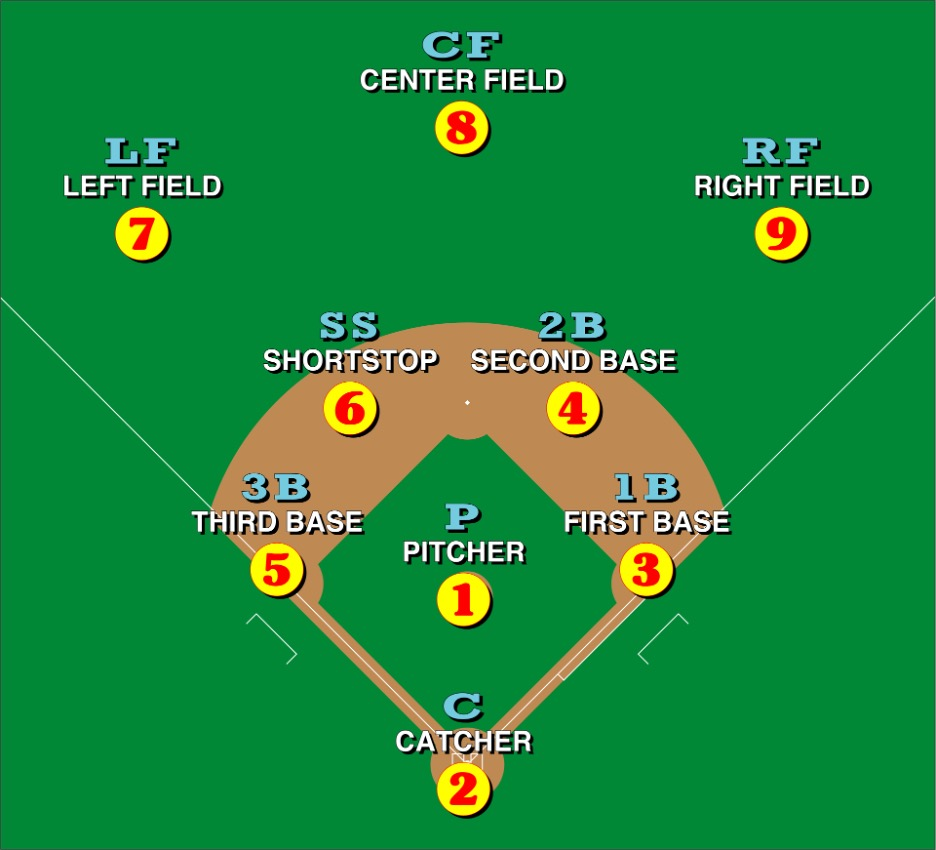
 

Infielders and Outfielders are positioned generally equidistant from each other, and this alignment has been thought to allow for the most ground to be within the range of infielders to defend. 

With the advent of modern-tracking technology (radar, video, among others), and the baseball data-driven revolution that has occurred in the past two decades, teams are moving away from traditional defensive positioning and are starting to employ more granular positioning based on the offensive profile of each batter. These positionings are collectively known as “the shift.”

The most common shift seen in baseball is employed when left-handed batters are at bat. Left-handed batters stand in the batter’s box on the right side of the field and are generally assumed to favor hitting the ball towards the right side of the field, called the “lefty pull side,” as opposed to the left side of the field which is called “the lefty opposite side.” The following image portrays a left handed batter and the shift employed against him.
(Source: https://img.mlbstatic.com/mlb-images/image/private/ar_16:9,g_auto,q_auto:good,w_1024,c_fill,f_jpg,dpr_3.0/mlb/turjupzil3galmmhh3vq)


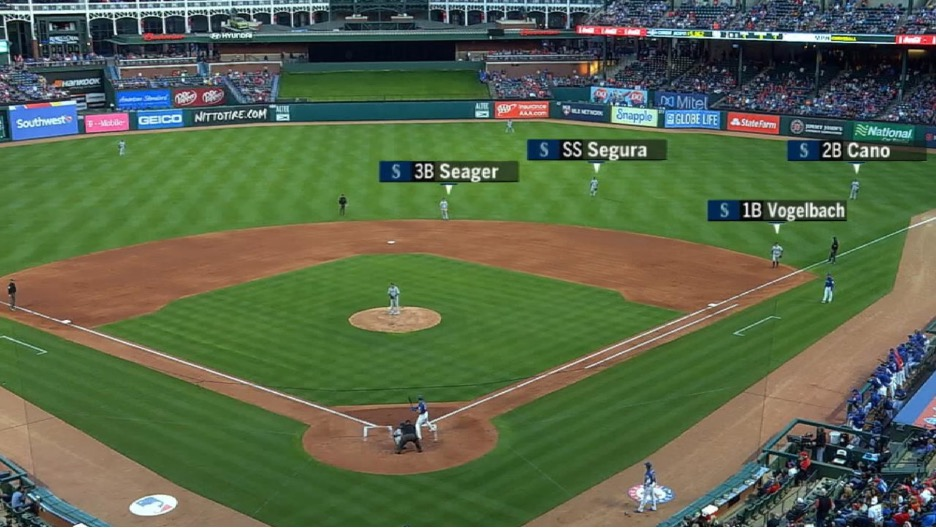

As one can see, the lefty batter is in the right sided batter’s box, and the entire infield is shifted towards the right side of the field, anticipating that the ball will be hit towards the right side of the field (the pull side of the lefty batter).

The following image is another example of a shift against a lefty, with an overlay of the distribution of the batters’ balls in play. As one can see, this lefty batter clearly prefers his pull side, and the defense is accordingly positioned.
(Source: https://www.dodgerthoughts.com/wp-content/uploads/2018/10/Screen-Shot-2018-10-09-at-8.51.38-PM.png)
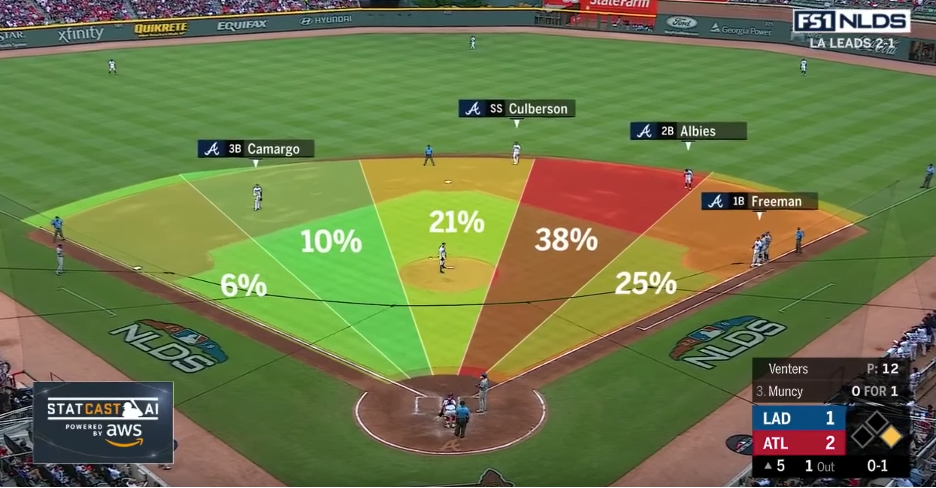

Another image showing a typical alignment of fielders in a shift against a left-handed batter.
(Source: https://img.mlbstatic.com/mlb-images/image/private/mlb/ldmedhvlznyovl5gngta![image.png](attachment:image.png))

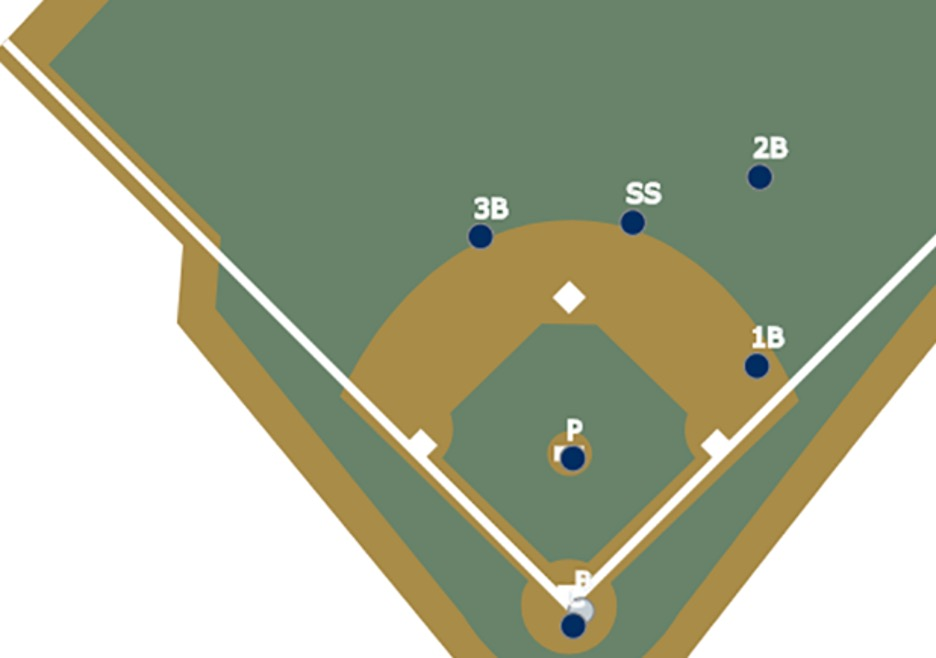

Right-handed batters, who stand in the batter’s box on the left side of the field, are “shifted on” at much lower rates. This is due to several different reasons, the discussion of which is outside the scope of this proposal. Shown below is an image of a right-handed batter, with the defense shifted towards the left side of the field, anticipating the batter to hit the ball towards the righty pull side.
(Source: https://a.espncdn.com/photo/2012/0625/mlb_encarnacion_shift_576.jpg![image.png](attachment:image.png)
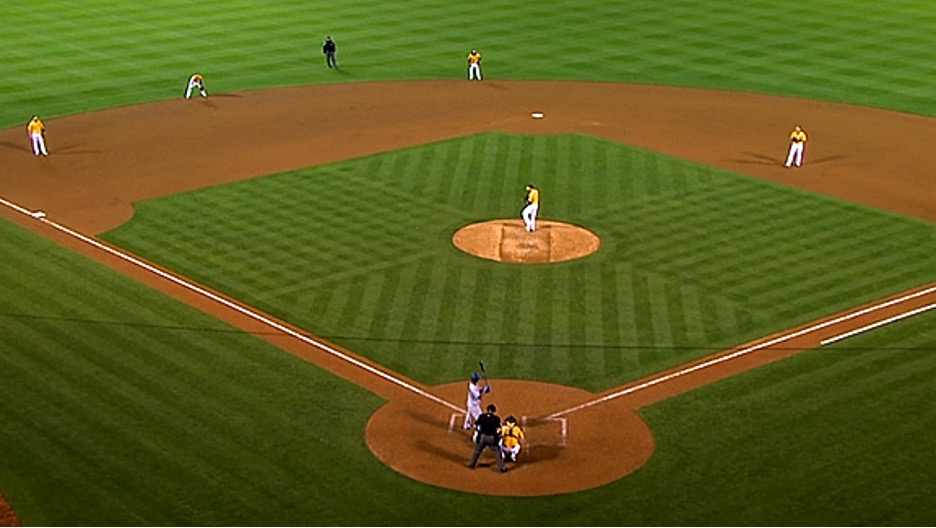

We propose to evaluate how the shift is used by teams and its effectiveness in preventing offensive production. The data we used in this analysis comes from [Baseball Savant](https://baseballsavant.mlb.com/) which provides an api to access its data. Baseball Savant provides shifting data for teams, as well as certain relevant offensive and defensive statistics. The Statcast tool of Baseball Savant tracks and stores data metrics from games. The data is on an individual pitch basis, thus resulting in huge datasets that track several dozen statistics for every single pitch of the entire season. More information about the dataset is provided here: (https://baseballsavant.mlb.com/csv-docs). The second set of data will be obtained from [FanGraphs](https://www.fangraphs.com/), which provides other relevant offensive and defensive statistics on a per season basis. This data will be downloaded from CSV files that Fangraphs can create. 

We extracted data from the 2016 - 2019 baseball seasons for left-handed batters. We limit our analysis to left handed hitters as lefties are shifted on at a much higher rate than right handed batters. We also limit the data to these years as 2016 is the first year StatCast has complete shifting data, and the 2020 season was abbreviated due to COVID. The goal is to observe trends in shifting increases and find out what relationship exists between this trend and its effectiveness, as characterized by Batting Average on Balls in Play (BABIP) on groundballs. Groundballs (as opposed to line drives, flyballs, and pop flys) are the generally the only type of batted ball which the infielders are tasked with defending. 

We will also attempt to analyze if the shift has any effect on other more general offensive statistics, as will be explained below.

Analyzing the usage and results of the shift is crucial for teams as they seek to exploit every competitive advantage over their opponents. Maximizing a team’s defensive capabilities of and thus suppressing the offense of an opponent is crucial to winning games, making the playoffs, and with baseball being a business as well, providing profits for teams.

We include several graphics that describe our data, perform a data reshaping operation (transforming from wide to long), preform data preparation and feature engineering. We also will be using many group-by functions, preforming two statistical analyses, and will be using a decision tree algorithim which we did not cover in class.

## Research Approach

Our data management strategy:
The data lends itself to being stored in pandas dataframes, and we plan to manipulate it within our respective python environments.  

After we load the required data of the 2016-2019 seasons, we perform cleaning operations to limit the datasets to the required variables. We then created a chart showing the increase of shifting strategies over the past years, which is the basis of our analysis. Afterwards we created a scatter plot showing the change of groundball BABIP over time. This chart shows that as shifting percentage increases, BABIP on groundballs decreases. We then will focus on one particular season (2017) to analyze the effect of the shift. We create a chart comparing various offensive statistics to see if the shift has any consequences on general offensive production. We finally use two ML methods (a logistic regression and a decision tree) to see if infield alignment affects groundball hit probability.

## Data Preparation, Exploratory Data Analysis,  and Prepped Data Review

We first import all the necessary libraries.
It is important to note that we use two libraries that must be installed. The first is pybaseball, which is the api for accessing the StatCast data. It can be installed using pip:

pip install pybaseball

The second is pandas profiling, which will be used as part of our EDA. It can also be installed using pip:

pip install pandas-profiling

In [29]:
import pybaseball
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import pandas_profiling

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression

We first load the CSV file we obtained from FanGraphs, the details are explained below.

In [2]:
lefties_fangraphs = pd.read_csv('https://raw.githubusercontent.com/mark-kaplan-0/DAV-5400-data/main/fangraphs_1.csv')
lefties_fangraphs

,Shift,AVG,ISO,Pull%,Cent%,Oppo%,Hard%
0,No Shift,0.225140,0.019222,0.550861,0.315063,0.134076,0.264535
1,Traditional Shift,0.214677,0.017724,0.551528,0.329284,0.119187,0.264861


We load the data sets from the StatCast API. These are incredibly large datasets which include data for every single pitch in the 2016-2019 seasons. We will perform data cleaning operations to eliminate the data we do not need, and organize the data that we will be using.

In [18]:
pybaseball.cache.disable()
data_2016 = pybaseball.statcast(start_dt='2016-04-03', end_dt='2016-10-02', verbose=True)

This is a large query, it may take a moment to complete


/opt/anaconda3/lib/python3.9/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|█████████████████████████████████████████| 183/183 [00:43<00:00,  4.21it/s]


In [4]:
data1 = pd.DataFrame(data_2016)
data1

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2124,FF,2016-10-02,96.4,-0.49,6.04,"Osuna, Roberto",598265,532077,field_out,hit_into_play,...,2,2,1,1,2,Standard,Standard,210,-0.169,-0.356
2176,FF,2016-10-02,96.8,-0.25,6.12,"Osuna, Roberto",598265,532077,None,called_strike,...,2,2,1,1,2,Standard,Standard,193,-0.169,-0.065
2240,FT,2016-10-02,96.7,-0.4,5.99,"Osuna, Roberto",593428,532077,single,hit_into_play,...,2,2,1,1,2,Standard,Strategic,213,0.073,0.253
2353,FF,2016-10-02,97.0,-0.39,5.98,"Osuna, Roberto",593428,532077,None,called_strike,...,2,2,1,1,2,Standard,Strategic,182,0.0,-0.054
2446,FF,2016-10-02,93.6,-0.41,6.03,"Osuna, Roberto",593428,532077,None,ball,...,2,2,1,1,2,Standard,Strategic,156,0.0,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,KC,2016-04-03,84.0,-1.57,5.42,"Vólquez, Edinson",434158,450172,None,foul,...,0,0,0,0,0,Standard,Standard,56,0.0,0.0
780,SI,2016-04-03,96.6,-1.17,5.44,"Vólquez, Edinson",434158,450172,None,ball,...,0,0,0,0,0,Standard,Standard,254,0.0,0.04
793,SI,2016-04-03,96.9,-1.05,5.38,"Vólquez, Edinson",434158,450172,None,ball,...,0,0,0,0,0,Standard,Standard,247,0.0,0.018
829,KC,2016-04-03,82.5,-1.46,5.48,"Vólquez, Edinson",434158,450172,None,called_strike,...,0,0,0,0,0,Standard,Standard,50,0.0,-0.05


A null value in the "events" column means that the Plate Appereance (PA) has not been finished, and will continue on for at least one more pitch. Since we are looking at the result of each PA we drop all null values.

In [5]:
df_2016 = data1[data1['events'].notna()]

As noted above, we are limiting our analysis to left-handed batters, and drop all right-handed batters from the dataframe.

In [6]:
df_2016 = df_2016.loc[df_2016['stand'] == 'L']

Our analysis is focused on the traditional alignment vs the shifted alignment, and thus we remove any fielding alighments that are entitled "Strategic."

In [7]:
df_2016 = df_2016.loc[df_2016['if_fielding_alignment'] != 'Strategic']

Finally we keep only the columns we will be using in our analysis.
The following are the definitions for the columns which will be used, taken from StatCast's official documentation:

events

Event of the resulting Plate Appearance.

description

Description of the resulting pitch.


woba_value

wOBA value based on result of play.

babip_value

BABIP value based on result of play.

if_fielding_alignment

Infield fielding alignment at the time of the pitch.


bb_type

Batted ball type, ground_ball, line_drive, fly_ball, popup.

In [8]:
df_2016 = df_2016[['events', 'description', 'woba_value', 'babip_value', 'bb_type', 'if_fielding_alignment']]

To get the total number of Lefty PA's, we find the number of rows in our dataframe; as noted above we only kept the rows which result in the end of a PA.

In [9]:
total_lefty_PA_2016 = len(df_2016.index)

We now do the same data cleaning operations for the 2017, 2018, and 2019 data. We also enable the cache in the pybaseball library.

In [10]:
pybaseball.cache.enable()

In [11]:
data_2017 = pybaseball.statcast(start_dt='2017-04-02', end_dt='2017-10-01', verbose=True)

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████| 183/183 [00:03<00:00, 52.79it/s]


In [12]:
data_2017_pd = pd.DataFrame(data_2017)
df_2017 = data_2017_pd[data_2017_pd['events'].notna()]
df_2017 = df_2017.loc[df_2017['stand'] == 'L']
df_2017 = df_2017[['events', 'description', 'woba_value', 'babip_value', 'bb_type', 'if_fielding_alignment']]
df_2017 = df_2017.loc[df_2017['if_fielding_alignment'] != 'Strategic']
total_lefty_PA_2017 = len(df_2017.index)

In [13]:
data_2018 = pybaseball.statcast(start_dt='2018-03-29', end_dt='2018-10-01', verbose=True)

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████| 187/187 [00:03<00:00, 50.92it/s]


In [14]:
data_2018_pd = pd.DataFrame(data_2018)
df_2018 = data_2018_pd[data_2018_pd['events'].notna()]
df_2018 = df_2018.loc[df_2018['stand'] == 'L']
df_2018 = df_2018[['events', 'description', 'woba_value', 'babip_value', 'bb_type', 'if_fielding_alignment']]
df_2018 = df_2018.loc[df_2018['if_fielding_alignment'] != 'Strategic']
total_lefty_PA_2018 = len(df_2018.index)

In [15]:
data_2019 = pybaseball.statcast(start_dt='2019-03-20', end_dt='2019-09-29', verbose=True)

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████| 194/194 [00:03<00:00, 52.98it/s]


In [16]:
data_2019_pd = pd.DataFrame(data_2019)
df_2019 = data_2019[data_2019['events'].notna()]
df_2019 = df_2019.loc[df_2019['stand'] == 'L']
df_2019 = df_2019[['events', 'description', 'woba_value', 'babip_value', 'bb_type', 'if_fielding_alignment']]
df_2019 = df_2019.loc[df_2019['if_fielding_alignment'] != 'Strategic']
total_lefty_PA_2019 = len(df_2019.index)

We now present the results of one year's worth of data. As can be seen, we have limited the results to far fewer rows and columns. Since we will be doing an in depth analysis in the year 2017 in particular we also present the profile of the dataframe using the Pandas Profiling package. We use the profile to perform  EDA on the data and identify any potential issues such as null data and data types before proceeding to apply our statistical analysis on the 2017 data. It also provides us with the distinct variables in each column, which will be needed for further groupby functions.

In [17]:
df_2017

,events,description,woba_value,babip_value,bb_type,if_fielding_alignment
2237,field_out,hit_into_play,0.0,0,popup,Infield shift
3576,strikeout,swinging_strike,0.0,0,None,Standard
2591,field_out,hit_into_play,0.0,0,fly_ball,Infield shift
3411,field_out,hit_into_play,0.0,0,ground_ball,Infield shift
4077,strikeout,swinging_strike,0.0,0,None,Standard
...,...,...,...,...,...,...
436,strikeout,swinging_strike,0.0,0,None,Standard
659,field_out,hit_into_play,0.0,0,fly_ball,Standard
556,grounded_into_double_play,hit_into_play,0.0,0,ground_ball,Standard
621,single,hit_into_play,0.9,1,line_drive,Standard


In [19]:
df_2017.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Before doing any analysis we must show that shifting on lefty batters is in fact increasing year over year throughout the MLB. To do this we perform the following groupby operations and create a bar plot showing our results.

In [20]:
group_2016 = df_2016.groupby(['if_fielding_alignment']).size().reset_index(name='counts') # find the counts per fielding alignment
group_2016["year"] = 2016
group_2016

,if_fielding_alignment,counts,year
0,Infield shift,17992,2016
1,Standard,47701,2016


In [21]:
total_2016_shift_percentage = (group_2016.iloc[0][1]/total_lefty_PA_2016) * 100 # we find the 2016 shifting percentage of Plate Appearences
total_2016_shift_percentage

26.562338525134717

We repeat the same process for the rest of the years.

In [22]:
group_2017 = df_2017.groupby(['if_fielding_alignment']).size().reset_index(name='counts') # find the counts per fielding alignment
group_2017["year"] = 2017
total_2017_shift_percentage = (group_2017.iloc[0][1]/total_lefty_PA_2017) * 100 # we find the 2017 shifting percentage of Plate Appearences

group_2018 = df_2018.groupby(['if_fielding_alignment']).size().reset_index(name='counts') # find the counts per fielding alignment
group_2018["year"] = 2018
total_2018_shift_percentage = (group_2018.iloc[0][1]/total_lefty_PA_2018) * 100 # we find the 2018 shifting percentage of Plate Appearences

group_2019 = df_2019.groupby(['if_fielding_alignment']).size().reset_index(name='counts') # find the counts per fielding alignment
group_2019["year"] = 2019
total_2019_shift_percentage = (group_2019.iloc[0][1]/total_lefty_PA_2019) * 100 # we find the 2019 shifting percentage of Plate Appearences

We now combine all of the years into one dataframe, and create a barplot showing the results.

In [23]:
b = pd.concat([group_2016, group_2017, group_2018, group_2019], ignore_index=True)
b

,if_fielding_alignment,counts,year
0,Infield shift,17992,2016
1,Standard,47701,2016
2,Infield shift,16424,2017
3,Standard,48807,2017
4,Infield shift,22096,2018
5,Standard,43206,2018
6,Infield shift,31552,2019
7,Standard,34643,2019


In [30]:
matplotlib.use('module://ipykernel.pylab.backend_inline') 

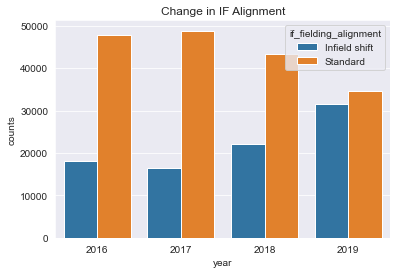

In [31]:
sns.set_style("darkgrid")
ax = sns.barplot(x="year", y="counts", hue="if_fielding_alignment", data=b).set_title("Change in IF Alignment")
plt.show()

As shown the number of infield shifts vs standard alignments increases significantly from 2017 to 2019.

We will now prepare the data for our graph which of change in babip per year. We do this by the following groupby operations which obtain the babip value for all ground balls in a particular year.

In [32]:
gb_babip_2016 = df_2016.groupby(['bb_type'])['babip_value'].mean().reset_index() # group by batted ball type
gb_babip_2016 = gb_babip_2016.loc[gb_babip_2016['bb_type'] == 'ground_ball'] # include only ground balls
gb_babip_2016["year"] = 2016
gb_babip_2016["shift_percent"] = total_2016_shift_percentage
gb_babip_2016

,bb_type,babip_value,year,shift_percent
1,ground_ball,0.235493,2016,26.562339


The operations for the rest of the years and the final combined dataframe.

In [33]:
gb_babip_2017 = df_2017.groupby(['bb_type'])['babip_value'].mean().reset_index()
gb_babip_2017 = gb_babip_2017.loc[gb_babip_2017['bb_type'] == 'ground_ball']
gb_babip_2017["year"] = 2017
gb_babip_2017["shift_percent"] = total_2017_shift_percentage

gb_babip_2018 = df_2018.groupby(['bb_type'])['babip_value'].mean().reset_index()
gb_babip_2018 = gb_babip_2018.loc[gb_babip_2018['bb_type'] == 'ground_ball']
gb_babip_2018["year"] = 2018
gb_babip_2018["shift_percent"] = total_2018_shift_percentage

gb_babip_2019 = df_2019.groupby(['bb_type'])['babip_value'].mean().reset_index()
gb_babip_2019 = gb_babip_2019.loc[gb_babip_2019['bb_type'] == 'ground_ball']
gb_babip_2019["year"] = 2019
gb_babip_2019["shift_percent"] = total_2019_shift_percentage

c = pd.concat([gb_babip_2016, gb_babip_2017, gb_babip_2018, gb_babip_2019], ignore_index=True)
c

,bb_type,babip_value,year,shift_percent
0,ground_ball,0.235493,2016,26.562339
1,ground_ball,0.239336,2017,24.775984
2,ground_ball,0.232573,2018,33.142343
3,ground_ball,0.231802,2019,47.057420


## Investigative Analysis & Results

As mentioned above, our primary question is: how does shifting affect groundball BABIP? To answer this question we will create a graph showing change in BABIP over year, and then move on to a statistical and machine learning study.

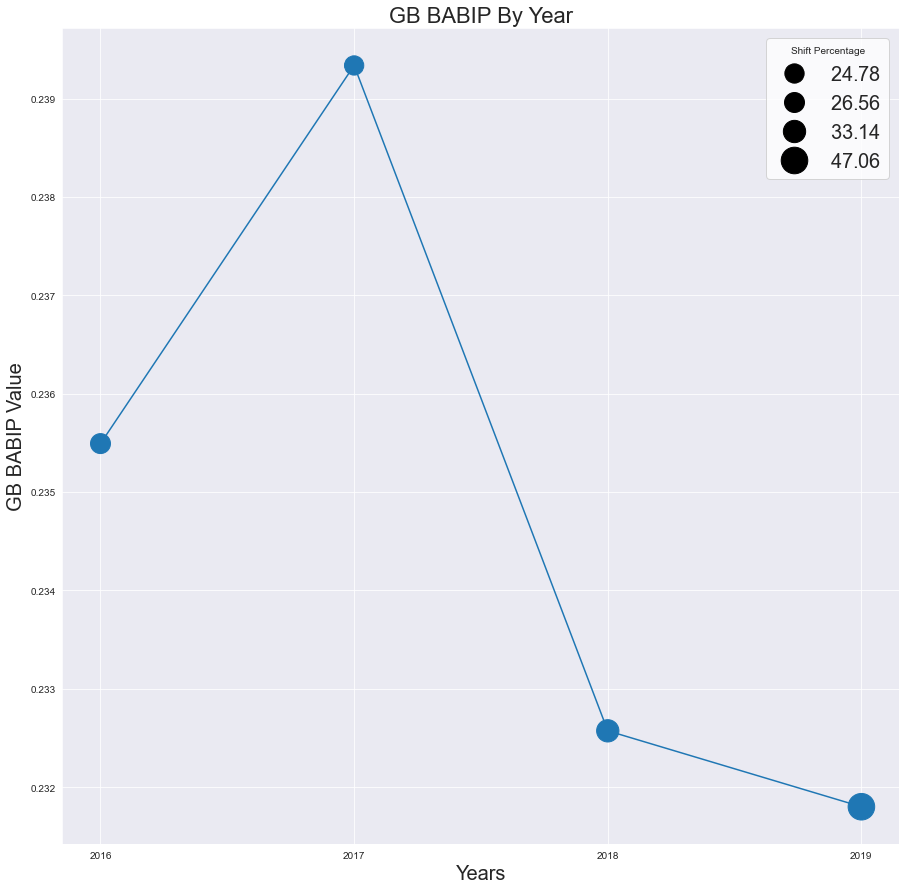

In [63]:
import matplotlib.pyplot as plt


x = c.iloc[:,2].to_numpy()
y = c.iloc[:,1].to_numpy()
size_price = c.iloc[:,3].to_numpy()
plt.plot(x,y)

scatter = plt.scatter(x, y, s=(size_price*15))

plt.title("GB BABIP By Year", fontsize=22)
  
plt.xlabel('Years',fontsize=20)
plt.ylabel('GB BABIP Value',fontsize=20)

kw = dict(prop="sizes", 
          func=lambda s: (s/15))
plt.legend(*scatter.legend_elements(**kw),
                    loc="upper right", prop={'size': 20}, frameon = True, facecolor = 'white', title = 'Shift Percentage')
plt.xticks(x)
plt.rcParams['figure.figsize'] = [6, 6]

plt.show()

As shown, with Shift Percentage increasing year over year, the groundball BABIP decreases, thus showing that the shift is effective in decreasing groundball hits.

In the next section we will employ two machine learning techniques, a logistic regression and a decision tree, to see if infield alignment affects hit probability. First we will run both of the ML techniques with the two basic descriptors of a batted ball, launch speed and launch angle. For more info see here (https://www.mlb.com/glossary/statcast/expected-batting-average) 

We will then add IF Fielding Alignment as another attribute, to see if the logistic regression and decision tree become more accurate in predicting hits with shift data added. 

As mentioned above, we will limit our in depth investigations to 2017 data.

In [38]:
data_tree = data_2017_pd[['bb_type', 'launch_speed', 'launch_angle',  'stand', 'events', 'description', 'babip_value', 'if_fielding_alignment']]

We perform the same data cleaning techniques as above.

In [39]:
df_tree = data_tree[data_tree['events'].notna()]
df_tree = df_tree.loc[df_tree['stand'] == 'L']
df_tree = df_tree.drop(columns = ['stand'])
df_tree = df_tree.loc[df_tree['if_fielding_alignment'] != 'Strategic']
df_tree = df_tree.loc[df_tree['bb_type'] == 'ground_ball']
df_tree = df_tree[df_tree['if_fielding_alignment'].notna()]

For the ML techniques, we make use of the Profile Report shown above which tells us that many values are unknown, and that we must change the columns to the correct type.

In [40]:
df_tree = df_tree.dropna()
df_tree = df_tree[df_tree['launch_speed'] != 'unknown'] # removing unkown variables
df_tree = df_tree[df_tree['launch_angle'] != 'unknown']
df_tree = df_tree[df_tree['if_fielding_alignment'] != 'unknown']

df_tree[["launch_speed", "launch_angle"]] = df_tree[["launch_speed", "launch_angle"]].apply(pd.to_numeric) # changing types
df_tree['babip_value'] = df_tree['babip_value'].astype('bool')

df_tree.loc[df_tree.if_fielding_alignment == 'Standard', 'if_fielding_alignment'] = 1 # setting the infield alignment data to booleans
df_tree.loc[df_tree.if_fielding_alignment == 'Infield shift', 'if_fielding_alignment'] = 0
df_tree['if_fielding_alignment'] = df_tree['if_fielding_alignment'].astype('bool')

df_tree

,bb_type,launch_speed,launch_angle,events,description,babip_value,if_fielding_alignment
3411,ground_ball,86.8,9,field_out,hit_into_play,False,False
2937,ground_ball,101.1,-16,field_out,hit_into_play,False,True
775,ground_ball,87.3,-19,field_out,hit_into_play,False,True
1351,ground_ball,61.2,-22,field_out,hit_into_play,False,True
1733,ground_ball,86.9,-12,field_out,hit_into_play,False,True
...,...,...,...,...,...,...,...
516,ground_ball,90.6,-10,force_out,hit_into_play,False,True
796,ground_ball,71.0,-11,force_out,hit_into_play,False,True
206,ground_ball,94.7,-13,field_out,hit_into_play,False,True
251,ground_ball,82.9,-21,field_out,hit_into_play,False,True


In [41]:
#split dataset in features and target variable
feature_cols_1_a = ['launch_speed', 'launch_angle']
X = df_tree[feature_cols_1_a] # Features
y = df_tree['babip_value'] # Target variable

#splitting data into 25% to be used for test, and 75% to be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)

# we fit a logistic regression model and apply it to predict
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7602268124746862
Precision: 0.5402298850574713
Recall: 0.03946263643996641


Our accuracy is .76. We now add if_fielding_alignment as an additional feature.

In [42]:
feature_cols_1_b = ['launch_speed', 'launch_angle', 'if_fielding_alignment']
X = df_tree[feature_cols_1_b] # Features
y = df_tree['babip_value'] # Target variable

#splitting data into 25% to be used for test, and 75% to be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7644795463750507
Precision: 0.6044776119402985
Recall: 0.06801007556675064


Our second model is slightly more accurate (76.4 vs 76.0) and precise (.60 vs .54)

We now try the same experiment using a decision tree method.

In [43]:
feature_cols_2_a = ['launch_speed', 'launch_angle']
X = df_tree[feature_cols_2_a] # Features
y = df_tree['babip_value'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7303408707391158
Precision: 0.4194880264244426
Recall: 0.3620812544547398


We now add fielding alignment as an additional feature.

In [44]:
feature_cols_2_b = ['launch_speed', 'launch_angle', 'if_fielding_alignment']
X = df_tree[feature_cols_2_b] # Features
y = df_tree['babip_value'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7266284171447857
Precision: 0.412711182622687
Recall: 0.36564504632929434


Interestingly, the decision tree accuracy is slightly lower with fielding alignment data added, with the precision being almost the same. 

Our next analysis will be an in-depth look at the effect of the shift on the many different offensive statstics of the 2017. This analysis will show if the shift may have any unintended consequences, possibly caused by pitchers pitching differently knowing the defense is set up in a different manner.

In [45]:
df = df_2017

### Finding our Measurables
#### BABIP
First we want to find the babip value of different types of plays, according to the fielding alignment. 

In [46]:
res = df.groupby(['if_fielding_alignment', 'bb_type'])['babip_value'].mean().reset_index()
res

,if_fielding_alignment,bb_type,babip_value
0,Infield shift,fly_ball,0.082585
1,Infield shift,ground_ball,0.200478
2,Infield shift,line_drive,0.594983
3,Infield shift,popup,0.0157
4,Standard,fly_ball,0.101269
5,Standard,ground_ball,0.249544
6,Standard,line_drive,0.59588
7,Standard,popup,0.024025


The play type that we care about specificially are ground balls. We can see that standard fielding allows a .249 BABIP, while an infield shift allows .200. 

In [47]:
df_K = df.loc[((df['events'] == 'strikeout_double_play') | (df['events'] == 'strikeout'))]
df_K.groupby(['if_fielding_alignment']).size().reset_index(name='strikeouts')

,if_fielding_alignment,strikeouts
0,Infield shift,3904
1,Standard,9707


In [48]:
df_w = df.loc[df['events'] == 'walk']
df_w.groupby(['if_fielding_alignment']).size().reset_index(name='walks')

,if_fielding_alignment,walks
0,Infield shift,1711
1,Standard,4018


In [49]:
res1 = df.groupby(['if_fielding_alignment', 'bb_type'])['woba_value'].mean().reset_index()
res1

,if_fielding_alignment,bb_type,woba_value
0,Infield shift,fly_ball,0.532636
1,Infield shift,ground_ball,0.199761
2,Infield shift,line_drive,0.70332
3,Infield shift,popup,0.023671
4,Standard,fly_ball,0.421603
5,Standard,ground_ball,0.247017
6,Standard,line_drive,0.665384
7,Standard,popup,0.026541


In [50]:
res2 = df.groupby(['if_fielding_alignment'])['woba_value'].mean().reset_index()
res2

,if_fielding_alignment,woba_value
0,Infield shift,0.342934
1,Standard,0.332993


In [51]:
df.groupby(['if_fielding_alignment']).size().reset_index(name='counts')

,if_fielding_alignment,counts
0,Infield shift,16424
1,Standard,48807


### Lefties fangraphs data
In addition to the metrics that we have pulled from pybaseball, we want to call additional measurements from lefties fangraphs. 

In [52]:
lefties_fangraphs

,Shift,AVG,ISO,Pull%,Cent%,Oppo%,Hard%
0,No Shift,0.225140,0.019222,0.550861,0.315063,0.134076,0.264535
1,Traditional Shift,0.214677,0.017724,0.551528,0.329284,0.119187,0.264861


### Comparing the defenses
First we must find the percentages of walks and strikeouts for each coverage, then the BAPIP, wOBA, AVG, ISO, PULL, CENT, and HARD measurements to compare. 

In [53]:
#First we take the data from pybaseball (from res, res1 and res2)
infield_k_percentage = 3904/16424*100
standard_k_percentage = 9707/48807*100
infield_walk_percentage = 1711/16424*100
standard_walk_percentage = 4018/48807*100
infield_k_minus_bb = infield_k_percentage - infield_walk_percentage
standard_k_minus_bb =  infield_k_percentage - standard_walk_percentage
infield_babip = 0.200
standard_babip = 0.249
infield_woba = 0.342
standard_woba = 0.332

# Next we input the data pulled from fan graph
infield_avg = 0.215
standard_avg = 0.225
infield_ISO = 0.018
standard_ISO = 0.019
infield_pull = 0.552
standard_pull = 0.551
infield_cent = 0.329
standard_cent =  0.315
infield_oppo = 0.119
standard_oppo = 0.134
infield_hard = 0.265
standard_hard = 0.265

# We need to find the difference in statistics between infield shift and standard defense.
k_difference = round(infield_k_percentage - standard_k_percentage,3)
walk_difference = round(infield_walk_percentage - standard_walk_percentage,3)
k_minus_bb_difference = round(infield_k_minus_bb - standard_k_minus_bb,3)
babip_difference = round(infield_babip - standard_babip,3)
woba_difference = round(infield_woba-standard_woba,3)
avg_difference = round(infield_avg-standard_avg,3)
ISO_difference = round(infield_ISO-standard_ISO,3)
pull_difference = round(infield_pull-standard_pull,3)
cent_difference = round(infield_cent-standard_cent,3)
oppo_difference = round(infield_oppo-standard_oppo,3)
hard_difference= round(infield_hard-standard_hard,3)

#Finally we want to present the percentage data in the proper formatting. We accomplish this by turning our int variables into strings.
infield_k_percentage_str = str(round(infield_k_percentage,3)) + "%"
standard_k_percentage_str = str(round(standard_k_percentage,3))+ "%"
infield_walk_percentage_str = str(round(infield_walk_percentage,3))+ "%"
standard_walk_percentage_str = str(round(standard_walk_percentage,3))+ "%"
infield_k_minus_bb_str = str(round(infield_k_minus_bb,3))+ "%"
standard_k_minus_bb_str = str(round(standard_k_minus_bb,3))+ "%"
k_difference_str = str(k_difference) + "%"
walk_difference = str(walk_difference) +"%"


### Creating Tables
Now we want to create a table that demonstrates the difference between the two strategies. 
We use matplotlib to create a table demonstrating the strengths and weaknesses of both. 

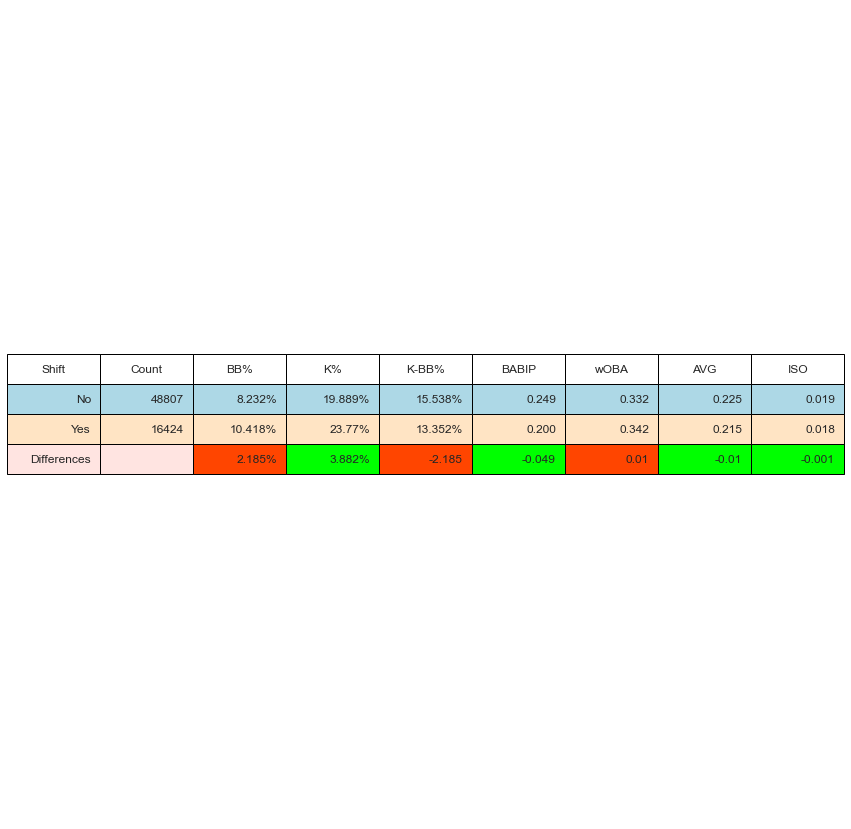

In [54]:
import matplotlib.pyplot as plt
# Prepare table
columns = ('Shift', 'Count', 'BB%', 'K%','K-BB%','BABIP', 'wOBA', 'AVG', 'ISO' )
rows = ["No", "Yes", "Difference"]
cell_text = [["No","48807",standard_walk_percentage_str,standard_k_percentage_str,standard_k_minus_bb_str,"0.249","0.332", standard_avg, standard_ISO], ["Yes","16424",infield_walk_percentage_str,infield_k_percentage_str,infield_k_minus_bb_str,"0.200","0.342",infield_avg, infield_ISO],["Differences","",walk_difference,k_difference_str,k_minus_bb_difference,babip_difference,woba_difference, avg_difference, ISO_difference]]
# Add a table at the bottom of the axes
colors = [["lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue"],[ "bisque","bisque","bisque","bisque","bisque","bisque","bisque","bisque","bisque"],["mistyrose","mistyrose","orangered","lime","orangered","lime","orangered","lime","lime"]]


fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=cell_text,cellColours=colors,
                     colLabels=columns,loc='center')
fig.set_figheight(15)
fig.set_figwidth(15)
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
plt.show()

In this chart BB% refers to walk percentage.  K% is strikeout percentage, K-BB% is simply K% - BB%, which is an overall metric looking at both strikes and walks. For more info see here: (https://library.fangraphs.com/offense/rate-stats/). wOBA is an overall statistic (https://library.fangraphs.com/offense/woba/). AVG is batting average and ISO is a statistic looking at the power a batter provides. (https://library.fangraphs.com/offense/iso/).

This chart tells us some interesting information. while K%, BABIP, AVG, and ISO are all lowered due to the shift, which is beneficial for the defense, BB%, K-BB% and wOBA are changed negatively, meaning in the batters favor. This may be to many different reasons, such as the one mentioned above in which pitchers approach shifted situations differently (and possibly worse) then normal situations. This requires more research. 

We now convert this chart to a long DF in order to make it easier to use for further research.

In [55]:
long_DF = pd.DataFrame(cell_text)
long_DF.columns = ['Shift', 'Count', 'BB%', 'K%','K-BB%','BABIP', 'wOBA', 'AVG', 'ISO']
long_DF = long_DF.iloc[0:2, :]
long_DF

,Shift,Count,BB%,K%,K-BB%,BABIP,wOBA,AVG,ISO
0,No,48807,8.232%,19.889%,15.538%,0.249,0.332,0.225,0.019
1,Yes,16424,10.418%,23.77%,13.352%,0.200,0.342,0.215,0.018


In [56]:
long_df1 = long_DF.melt(id_vars = ['Shift', 'Count'], value_vars = ['BB%', 'K%','K-BB%','BABIP', 'wOBA', 'AVG', 'ISO']) 
long_df1

,Shift,Count,variable,value
0,No,48807,BB%,8.232%
1,Yes,16424,BB%,10.418%
2,No,48807,K%,19.889%
3,Yes,16424,K%,23.77%
4,No,48807,K-BB%,15.538%
5,Yes,16424,K-BB%,13.352%
6,No,48807,BABIP,0.249
7,Yes,16424,BABIP,0.200
8,No,48807,wOBA,0.332
9,Yes,16424,wOBA,0.342


We now show second table which displays relevant hitter data. The columns show pull percentage (lefties hitting into the shift), center percentage (lefties hitting the ball up the middle,) opposite percentage (lefties hitting the ball away from the shift), and hard percentage (what fangraphs qualifies as a hard hit ball, see https://library.fangraphs.com/offense/quality-of-contact-stats/)

What this table may show us is if hitters change their hitting approach when shown a shift.

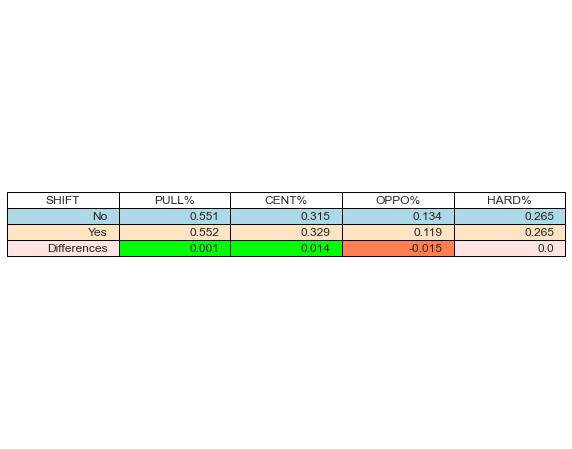

In [57]:
# Prepare table
columns = ('SHIFT','PULL%', 'CENT%', 'OPPO%', 'HARD%' )
rows = ["No", "Yes", "Difference"]
cell_text = [["No", standard_pull,standard_cent,standard_oppo,standard_hard], ["Yes",infield_pull,infield_cent,infield_oppo,infield_hard],["Differences",pull_difference,cent_difference,oppo_difference,hard_difference]]
# Add a table at the bottom of the axes
colors = [["lightblue","lightblue","lightblue","lightblue","lightblue"],[ "bisque","bisque","bisque","bisque","bisque"],["mistyrose","lime","lime","coral", "mistyrose"]]


fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=cell_text,cellColours=colors,
                     colLabels=columns,loc='center')
fig.set_figheight(8)
fig.set_figwidth(10)
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
plt.show()

As shown, hitters barely change their hitting approach when presented with a shifted defense.

## Conclusions and Further Analysis

We found that there is strong correlational relationship between a defensive shift against left-handed batters and a decreased BABIP for the opposing batter, but came short of a statistically significant causation. We also found that there were statistical changes to offensive hitters when faced with a shift.

BABIP Against Shifted Defense
We found that as shifted defenses increased, ground ball BABIP decreased, demonstrating that the strategy is effective at combatting lefty hitters.  We used a a logistic regression and a decision tree to test the robustness of our claim. We found that adding shifting data to the features of a logistic regression causes slightly more accurate hit probability predictions, but makes no change in the decision tree method.

2017 Season Offensive Statistics Analysis
We found that a switch to shift coverage against left handed hitters in the 2017 season negatively impacted a batter's strikeout rate, BABIP, batting average and isolated power, but also led to increases in walks, strike-outs-minus-walks and wOBA. We found much smaller changes in other indivigual offensive statistics such as hit direction (Pull, Cent, Oppo) and exit velocity (HARD), concluding that in our analysis we could not find significant changes in the ways that hitters approach at-bats.

Additional Research
The question of defensive infielding shifts against lefty batters is a constantly debated, scrutinized and researched question in proffesional baseball. We believe that our study reveals important information about the Batted Average on Balls in Play for leftys facing this defense. However there are a number of questions that could be used to consider this research. There are a multitude of offensive statistics that can be used in addition to or instead of BABIP, that focus on different areas of hitting, these could examine how this strategy works in certain situations. In the future, work could be done on how pitch count affects the the shifted infields effectiveness. Perhaps it is more effective with a full count than on the first pitch. Ultimately, we demonstrated the effect of the defensive shift against left handed batters on BABIP and other offensive measures, and believe that there is a multitude of interesting research yet to be done on the subject.